# 1. K-Means (10 points)<br>

#### A. K-Means algorithm splits a dataset X ∈ {x1 , . . . , xN } into K many partitions, where each Xk ⊆ X ∀k ∈ {1, . . . , K}. Clustering algorithms like the K-Means is a useful technique when the true labels are unknown. Or in other words, we are basically interested in analyzing patterns within the data and make useful inferences.<br>
#### In this task, you will implement a K-Means algorithm from scratch using the dataset ”HTRU 2.csv”. The dataset contains 8 continuous variables describing a pulsar candidate1. The task is to identify multiple (K) clusters that might best describe the classes within the data. Being a simple algorithm, we strongly advise you to implement the algorithm as per the lecture slides.


### 1. Initialize the cluster centers by selecting the first center at random and the rest sequentially based on the largest sum of distances to the selected cluster center.<br>
### 2. Run with different random initialization.<br>

### 3. Plot, a figure showing the selection of the best number of clusters K for each initialization.<br>

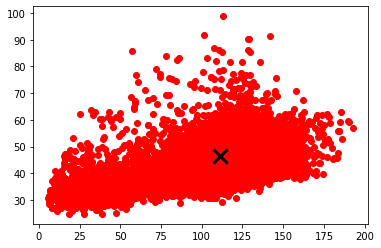

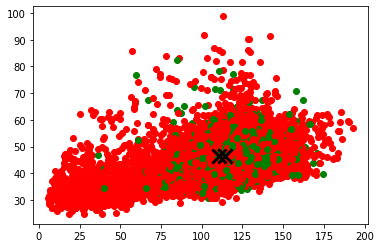

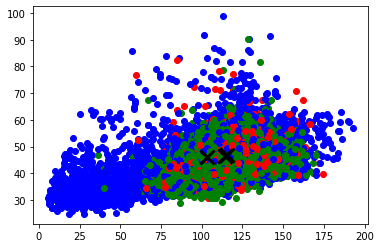

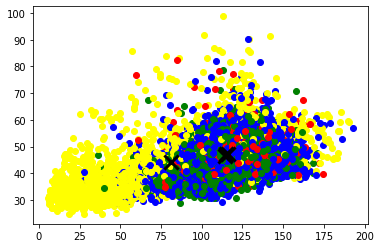

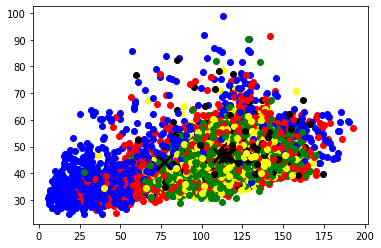

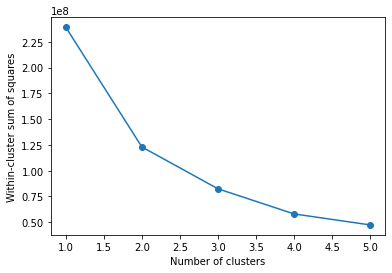

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(x, y):
    """Calculate the Euclidean distance between two points"""
    return np.sqrt(np.sum((x - y) ** 2))

def kmeans(X, k, max_iterations=10, tol=1e-4):
    """Implementation of K-Means algorithm"""
    N, D = X.shape
    # Initialize cluster centers randomly
    centers = X[np.random.choice(N, k, replace=False), :]
    # Initialize cluster assignments
    assignments = np.zeros(N)
    # Repeat until convergence or max_iterations is reached
    for i in range(max_iterations):
        # Assign each data point to the closest cluster center
        for j in range(N):
            min_distance = np.inf
            for c in range(k):
                distance = euclidean_distance(X[j, :], centers[c, :])
                if distance < min_distance:
                    min_distance = distance
                    assignments[j] = c
        # Update the cluster centers
        new_centers = np.zeros((k, D))
        count = np.zeros(k)
        for j in range(N):
            c = int(assignments[j])
            new_centers[c, :] += X[j, :]
            count[c] += 1
        for c in range(k):
            new_centers[c, :] /= count[c]
        # Check for convergence
        if np.sum(np.abs(centers - new_centers)) < tol:
            break
        centers = new_centers
    # Calculate WCSS
    WCSS = 0
    for j in range(N):
        c = int(assignments[j])
        WCSS += euclidean_distance(X[j, :], centers[c, :]) ** 2
    return assignments, centers, WCSS

def plot_kmeans_results(X, assignments, centers):
    """Plot the results of K-Means algorithm"""
    colors = ['red', 'green', 'blue', 'yellow', 'black', 'brown', 'purple', 'pink']
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], color=colors[int(assignments[i])])
    for i in range(centers.shape[0]):
        plt.scatter(centers[i, 0], centers[i, 1], marker='x', s=200, linewidth=3, color='black')
    plt.show()

def kmeans_elbow(X, k_max=5):
    """Determine the optimal number of clusters using the elbow method"""
    WCSS = []
    for k in range(1, k_max+1):
        assignments, centers, wcss = kmeans(X, k)
        WCSS.append(wcss)
        plot_kmeans_results(X, assignments, centers)
    plt.plot(range(1, k_max+1), WCSS, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Within-cluster sum of squares')
    plt.show()

if __name__ == '__main__':
    # Load the dataset
    df = pd.read_csv('HTRU_2.csv')
    X = df.values
    # Determine the optimal number of clusters using the elbow method
    kmeans_elbow(X)



In [3]:
def compute_distances(X, centers):
    """Compute the Euclidean distances from each data point to the cluster centers"""
    distances = np.zeros((X.shape[0], centers.shape[0]))
    for i, x in enumerate(X):
        for j, c in enumerate(centers):
            distances[i, j] = np.linalg.norm(x - c)
    return distances

def update_centers(X, assignments, k):
    """Update the cluster centers based on the assigned data points"""
    centers = np.zeros((k, X.shape[1]))
    for i in range(k):
        centers[i, :] = np.mean(X[assignments == i, :], axis=0)
    return centers

def compute_wcss(X, assignments, centers):
    """Compute the within-cluster sum of squares (WCSS)"""
    wcss = 0
    for i in range(centers.shape[0]):
        wcss += np.sum((X[assignments == i, :] - centers[i, :]) ** 2)
    return wcss

def initialize_centers(X, k):
    """Initialize the cluster centers by selecting the first center at random and the rest sequentially based on the largest sum of distances to the selected cluster center."""
    centers = np.zeros((k, X.shape[1]))
    centers[0, :] = X[np.random.randint(X.shape[0]), :]
    for i in range(1, k):
        distances = compute_distances(X, centers[:i, :])
        min_distances = np.min(distances, axis=1)
        centers[i, :] = X[np.argmax(min_distances), :]
    return centers


### 4. Optimize the algorithm and show runtime improvements.

In [4]:
def kmeans_minibatch(X, k, batch_size=100, max_iter=100):
    """K-Means algorithm using mini-batch optimization"""
    # Initialize the cluster centers
    centers = initialize_centers(X, k)
    n = X.shape[0]
    for i in range(max_iter):
        # Create a random subsample of the data
        batch_indices = np.random.choice(n, batch_size, replace=False)
        X_batch = X[batch_indices, :]
        # Compute the distances from each data point to the cluster centers
        distances = compute_distances(X_batch, centers)
        # Assign each data point to the nearest cluster center
        assignments = np.argmin(distances, axis=1)
        # Recompute the cluster centers
        centers = update_centers(X_batch, assignments, k)
    # Compute the final cluster assignments and WCSS
    distances = compute_distances(X, centers)
    assignments = np.argmin(distances, axis=1)
    wcss = compute_wcss(X, assignments, centers)
    return assignments, centers, wcss

In [11]:
import time
start = time.time()
assignments, centers, wcss = kmeans_minibatch(X, k=3)
print("My implementation, Time taken: ", time.time() - start)

/opt/homebrew/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


My implementation, Time taken:  0.7363667488098145



### Try to compare your results (cluster centers, loss/distortion) and runtime to the sklearn implementation of KMeans clustering algorithm for the same dataset.

In [17]:
import time
import pandas as pd
from sklearn.cluster import KMeans

# # Load the data
# data = pd.read_csv("HTRU_2.csv")
# X = data.values
# Run the implementation of the KMeans algorithm
start_time = time.time()
centers, assignments, wcss= kmeans(X, 5)
implementation_centers = centers
implementation_assignments = assignments
implementation_wcss = wcss
implementation_time = time.time() - start_time
# Run the KMeans algorithm
start_time = time.time()
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
sklearn_centers = kmeans.cluster_centers_
sklearn_assignments = kmeans.labels_
sklearn_wcss = kmeans.inertia_
sklearn_time = time.time() - start_time



# Compare the results
print("Centers from sklearn implementation: \n", sklearn_centers)
print("Centers from implementation: \n", implementation_centers)
print("\n")
print("WCSS from sklearn implementation: ", sklearn_wcss)
print("WCSS from implementation: ", implementation_wcss)
print("\n")
print("Running time of sklearn implementation: ", sklearn_time)
print("Running time of implementation: ", implementation_time)


Centers from sklearn implementation: 
 [[7.90835457e+01 4.39626094e+01 2.20157999e+00 1.13201044e+01
  8.09136624e+01 7.20370229e+01 7.37658797e-01 7.91887255e-01]
 [1.15892106e+02 4.72353793e+01 2.65450737e-01 6.08380940e-01
  5.87789488e+00 2.69715843e+01 6.48971742e+00 5.01403237e+01]
 [1.14984243e+02 4.79239647e+01 2.16973625e-01 3.69533540e-01
  5.96899575e-01 9.07550529e+00 2.28233567e+01 6.00092316e+02]
 [1.14279475e+02 4.63994052e+01 2.46621680e-01 4.83379298e-01
  1.14014349e+00 1.15600213e+01 1.51713089e+01 2.80895434e+02]
 [1.14624576e+02 4.65208651e+01 2.46192403e-01 4.67127774e-01
  2.02704524e+00 1.51175993e+01 1.04971253e+01 1.35116375e+02]]
Centers from implementation: 
 [0. 0. 1. ... 1. 0. 4.]


WCSS from sklearn implementation:  41793223.20450071
WCSS from implementation:  43950397.97748999


Running time of sklearn implementation:  0.528040885925293
Running time of implementation:  5.251811981201172


#### B. Principal Components Analysis (PCA) is a widely used method for reducing the number of dimensions to a low dimensional representation of the data. (You are allowed to use numpy.linalg.svd for single value decomposition). Use PCA to reduce the dimensionality of the data and represent the clusters (from the K-Means) in a 2D or 3D graph.

## PCA Implementation without SKLearn

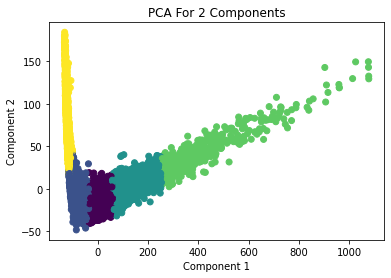

In [18]:
# Perform PCA on the data
X_center = X - X.mean(axis=0)
U, S, VT = np.linalg.svd(X_center, full_matrices=False)
X_pca = np.dot(X_center, VT.T[:, :2])

# Plot the results in 2D
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=implementation_centers, cmap='viridis')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA For 2 Components")
plt.show()

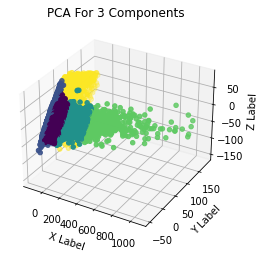

In [19]:
X_pca = np.dot(X_center, VT.T[:, :3])
# Plot the results in 3D (if desired)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=implementation_centers, cmap='viridis')
ax.set_title("PCA For 3 Components")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

## PCA Implementation Using SKLearn

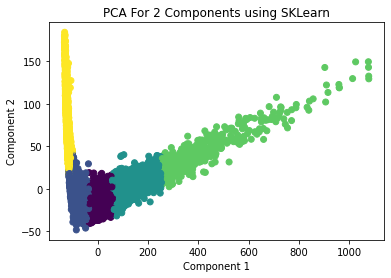

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_center)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=implementation_centers, cmap='viridis')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA For 2 Components using SKLearn")
plt.show()


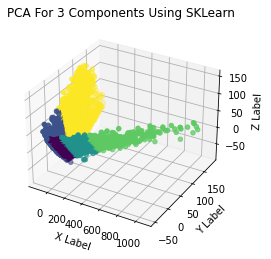

In [21]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_center)

# Plot the results in 3D (if desired)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=implementation_centers, cmap='viridis')
ax.set_title("PCA For 3 Components Using SKLearn")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()